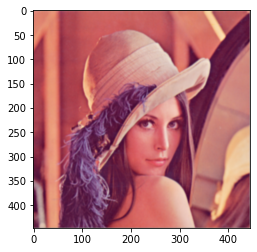

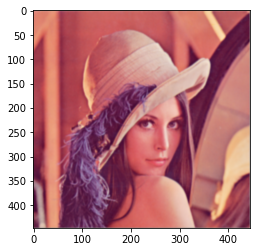

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


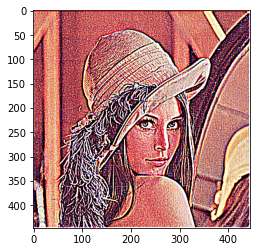

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

og_img=plt.imread('imagegirl.png')
og_img_arr=np.array(og_img)
box=np.array([
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
])

sharpen=np.array([
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,25,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1]
])

gaussian=np.array([[1,  4,  6,  4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1,  4,  6,  4, 1]])/256
                         
def convolution(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y,z = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1,z))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y,:]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
            for z1 in range(z):
                op_img[x1-int(xk/2),y1-int(yk/2),z1]=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk,z1]).sum()
    return op_img

res_img1 = convolution(box,og_img_arr)
plt.imshow(res_img1)
plt.show()
res_img2 = convolution(gaussian,og_img_arr)
plt.imshow(res_img2)
plt.show()
res_img3 = convolution(sharpen,og_img_arr)
plt.imshow(res_img3)
plt.show()

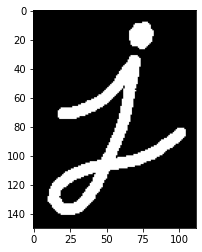

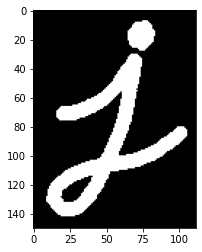

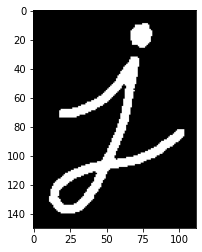

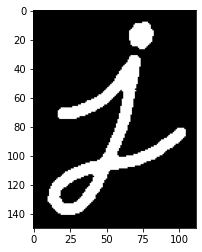

In [2]:
from PIL import Image

og_img=plt.imread('imagej.png')
template=np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]])

def convolution_dilation(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
                sum=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk]).sum()
                if(sum>0):
                    op_img[x1-int(xk/2),y1-int(yk/2)]=1
                else:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=0
    return op_img

def convolution_erosion(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
                sum=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk]).sum()
                if sum==5:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=1
                else:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=0
    return op_img

def rgb2gray(img):
    r,g,b = img[:,:,0],img[:,:,1],img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def gray2binary(gray):
    return (127 < gray) & (gray <= 255)

im = gray2binary(rgb2gray(np.array(Image.open('imagej.png'))))
im_dilation=convolution_dilation(template,im)
im_erosion=convolution_erosion(template,im)
im_ot=convolution_erosion(template,convolution_dilation(template,im))
img_dil=Image.fromarray(im_dilation).convert('RGB')
img_ero=Image.fromarray(im_erosion).convert('RGB')
img_ot=Image.fromarray(im_ot).convert('RGB')

plt.imshow(og_img)
plt.show()

plt.imshow(img_dil)
plt.show()

plt.imshow(img_ero)
plt.show()

plt.imshow(img_ot)
plt.show()

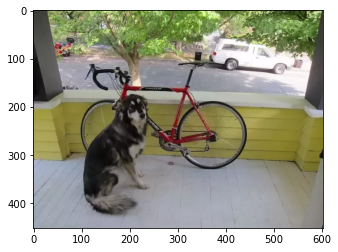

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


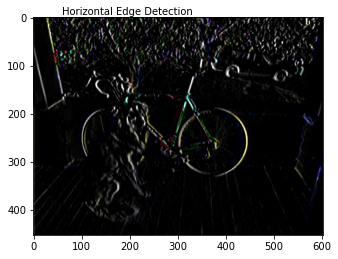

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


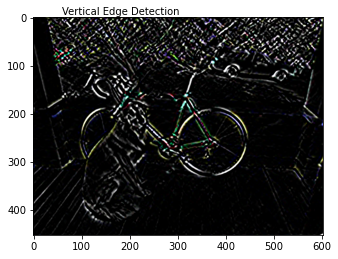

In [5]:
orig_img=plt.imread('edge-detection.png')
orig_img_arr=np.array(orig_img)
plt.imshow(orig_img_arr)
plt.show()

gaussian =np.array([[1,  4,  6,  4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1,  4,  6,  4, 1]])/256

y_kernel=np.array([
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])
x_kernel=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
def convolution(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y,z = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1,z))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y,:]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
            for z1 in range(z):
                op_img[x1-int(xk/2),y1-int(yk/2),z1]=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk,z1]).sum()
    return op_img

def rgb2gray(img):
    r,g,b = img[:,:,0],img[:,:,1],img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def gray2binary(gray):
    return (127 < gray) & (gray <= 255)

orig_img_arr = convolution(x_kernel,convolution(gaussian,orig_img_arr))
plt.imshow(orig_img_arr)
plt.text(60,-5,"Horizontal Edge Detection")

plt.show()

orig_img_arr1=np.array(orig_img)
orig_img_arr1 = convolution(y_kernel,convolution(gaussian,orig_img_arr))
plt.imshow(orig_img_arr1)
plt.text(60,-5,"Vertical Edge Detection")

plt.show()

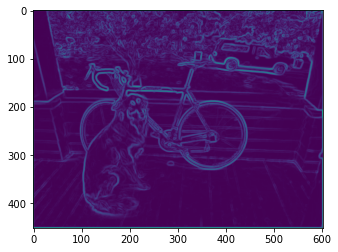

In [7]:
og_img=plt.imread('edge-detection.png')
og_img_arr=np.array(og_img)
img_op=np.zeros_like(og_img_arr)

avg_ker=1/16*np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
])

y_kernel=np.array([
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]
])
x_kernel=np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel=x_kernel+y_kernel

gaussian =np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256


def rgb2gray(img):
    r,g,b = img[:,:,0],img[:,:,1],img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def convolution(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
                op_img[x1-int(xk/2),y1-int(yk/2)]=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk]).sum()
    return op_img

def convolution2(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y,z = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1,z))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y,:]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
            for z1 in range(z):
                op_img[x1-int(xk/2),y1-int(yk/2),z1]=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk,z1]).sum()
    return op_img



res_og=rgb2gray(convolution2(gaussian,og_img_arr))
res_ogx=convolution(x_kernel,res_og)
res_ogy=convolution(y_kernel,res_og)
res_og_op=np.hypot(res_ogx,res_ogy)

plt.imshow(res_orig_op)
plt.show()

(216, 234, 4)


ValueError: could not broadcast input array from shape (216,234,4) into shape (157,173,3)

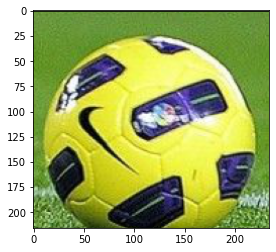

In [11]:
img=plt.imread('ball.png')
print(img.shape)
plt.imshow(img)
plt.show()
img1=plt.imread('roi.jpg')
img1_arr=np.array(img1)
img1_arr[870:1027,250:423,:]=img
plt.imshow(img1_arr)
plt.show()

ball = img1[870:1027, 1027:1200]
plt.imshow(ball)
plt.savefig('ball')
plt.show()